# Insert Title Here
**DATA102 S11 Group 3*
- Banzon, Beatrice Elaine B.
- Buitre, Cameron
- Marcelo, Andrea Jean C.
- Navarro, Alyssa Riantha R.
- Vicente, Francheska Josefa

# **Requirements and Imports**
Before starting, the relevant libraries and files in building and training the model should be loaded into the notebook first.

## **Basic** Libraries
* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [57]:
import numpy as np
import pandas as pd
import datasets

In [58]:
import matplotlib.pyplot as plt

## **`Natural Language Processing`** Libraries
* `train_test_split` is a function that allows the dataset to be split into two randomly.
* `TFidfVectorizer` converts the given text documents into a matrix, which has TF-IDF features
* `CountVectorizer` converts the given text documents into a matrix, which has the counts of the tokens

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## **`Machine Learning`** Libraries
The following classes are models that implement different methods of clustering.
- `KMeans`

In [60]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

On the other hand, these classes computes and visualizes the different scores about how well a model works.
* `f1_score` computes the balanced F-score by comparing the actual classes and the predicted classes
* `hamming_loss` computes the fraction of labels that were incorrectly labeled by the model
* `accuracy_score` computes the accuracy by determining how many classes were correctly predicted
* `precision_recall_fscore_support`computes the precision, recall, F-measure and support per class
* `ConfusionMatrixDisplay` allows the visualization of the computed confusion matrix
* `confusion_matrix`  is a function that displays the number of samples that are correctly and incorrectly labeled by the model, by grouping them into four groups (i.e., True Positives, False Positives, True Negatives, False Negatives)

In [61]:
from sklearn.metrics import f1_score, roc_auc_score, hamming_loss, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

Meanwhile, `GridSearchCV` is a cross-validation class that allows the exhaustive search over all possible combinations of hyperparameter values

In [63]:
from sklearn.model_selection import GridSearchCV

Last, `pickle` is a module that can serialize and deserialize objects. In this notebook, it is used to save and load models.

In [64]:
import pickle

### Datasets and Files
To train the models that utilizes the traditional machine learning algorithms, the dataset that was cleaned will be loaded using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [65]:
df = pd.read_csv ('cleaned_data.csv')
df

,label,text
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
23130,0,The winner of the special election in Cavite t...
23131,0,The remains of four people inside the Cessna p...
23132,0,A Kabataan Party-list representative visited t...
23133,0,The Philippine Coast Guard is expected to have...


In [66]:
def make_dataframe (df):
    true_df = df [df ['label'] == 1][['text', 'label']]
    false_df = df [df ['label'] == 0][['text', 'label']]
    
    num_of_true = len(true_df)
    
    false_df = false_df.sample(n = num_of_true)
    false_df = false_df.reset_index(drop=True)
    
    df = false_df.append(true_df, ignore_index = True)
    df = shuffle(df.reset_index(drop=True)).reset_index(drop=True)
    
    return df

In [67]:
df = make_dataframe (df)
df

C:\Users\admin\AppData\Local\Temp\ipykernel_20932\1097446513.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = false_df.append(true_df, ignore_index = True)


,text,label
0,The Commission on Elections (Comelec) will inc...,0
1,"Without a doubt, religion is one of the more d...",1
2,Is America On The Brink Of Civil War? 11/07/20...,1
3,Email According to Twitter page Jil al Hor...,1
4,"MANILA, Philippines – The Supreme Court has se...",0
...,...,...
9155,"Late last week, the US Department of Agricultu...",1
9156,"MOSCOW, Russia - The funeral of last Soviet le...",0
9157,One of the remaining drug cases against detain...,0
9158,Umaani ngayon ng batikos mula sa social media ...,1


In [68]:
df ['label'].value_counts ()

0    4580
1    4580
Name: label, dtype: int64

# **Feature Engineering**

As we cannot directly feed the text data as input to the machine learning models, we have to convert it into the format that they can understand—numbers. Before doing that, since we want to save the models and vectorizers that we will be using, we will first need to define the values and functions to do so, starting with the folder where we will be saving it. 

In [69]:
main_directory = './saved_models/Clustering/vectorizers/'

Next, we will be creating a function that will be saving the vectorizer to the specified path.

In [70]:
def save_vectorizers (vectorizer, vectorizer_name):
    vectorizer_filename = main_directory + vectorizer_name + '.pkl'
    
    with open(vectorizer_filename, 'wb') as file:
        pickle.dump(vectorizer, file)

## Splitting the Dataset into **`Train`**, **`Validation`**, and **`Test`** Split
Let us first define the **X** (input) and **y** (target/output) of our model. This is done to allow the stratifying of the data when it is split into the train, val and test.

The **X** (input) can be retrieved by getting the `text` column in the original dataset.

In [71]:
X = df ['text']
X

0       The Commission on Elections (Comelec) will inc...
1       Without a doubt, religion is one of the more d...
2       Is America On The Brink Of Civil War? 11/07/20...
3       Email     According to Twitter page Jil al Hor...
4       MANILA, Philippines – The Supreme Court has se...
                              ...                        
9155    Late last week, the US Department of Agricultu...
9156    MOSCOW, Russia - The funeral of last Soviet le...
9157    One of the remaining drug cases against detain...
9158    Umaani ngayon ng batikos mula sa social media ...
9159    The Department of Health (DOH) on Sunday recor...
Name: text, Length: 9160, dtype: object

In [72]:
y = df ['label']
y

0       0
1       1
2       1
3       1
4       0
       ..
9155    1
9156    0
9157    0
9158    1
9159    0
Name: label, Length: 9160, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42, 
                                                    shuffle = True)

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size = 0.1,
                                                  stratify = y_train,
                                                  random_state = 42, 
                                                  shuffle = True)

In [75]:
train_df = pd.concat([X_train, y_train], axis = 1).reset_index(drop = True)
train_df

,text,label
0,Insider Leaks Bill’s 2-Word Nickname For Hilla...,1
1,Nakunan ng ilang kababayan natin ang pagkasira...,1
2,X Dear Reader! VDARE.com isn’t just a website....,1
3,Mino-monitor na ng Philippine National Police ...,1
4,Nagiging aktrasyon sa mga tao ang kakaibang di...,0
...,...,...
6590,"License DMCA In an explosive interview, Newt...",1
6591,"Every GOP presidential candidate, most especia...",0
6592,Washington (CNN) Compromises on some of the cr...,0
6593,Sumuko na sa pulisya ang driver ng kotseng san...,1


In [76]:
val_df = pd.concat([X_val, y_val], axis = 1).reset_index(drop = True)
val_df

,text,label
0,"Batay sa imbestigasyon ng Cebu Police, ang ins...",0
1,Patay na at tadtad ng saksak sa katawan nang m...,0
2,Baguio City Bishop Victor Bendico is set to be...,0
3,Hindi pinalagpas ni Pangulong Rodrigo Duterte ...,1
4,Nasawi ang isang 60-anyos na lalaking may kapa...,0
...,...,...
728,"More than P900,000 worth of food packs and hyg...",0
729,"Matapos ang ilang taon, muling ipinagpatuloy a...",1
730,Resigned Sugar Regulatory Administration (SRA)...,0
731,The 11 service members who were onboard a Blac...,0


In [77]:
test_df = pd.concat([X_test, y_test], axis = 1).reset_index(drop = True)
test_df

,text,label
0,0 comments Megyn Kelly seems to think that s...,1
1,More Election Coverage New Heavy-Duty Voting M...,1
2,"Email Print In every competition out there, th...",1
3,After rumors circulated last week that former ...,0
4,Email The day after Hillary Clinton testif...,1
...,...,...
1827,"Today, an ever increasing number of earthquake...",1
1828,Share This The Clinton Foundation and its fo...,1
1829,Hindi pa man summer ay nauuso na ang pagsusuot...,1
1830,What Happened to the FBI? What Happened to the...,1


In [78]:
print('Train')
print('Input  shape: ', X_train.shape)
print('Output shape: ', y_train.shape, '\n')

print('Val')
print('Input  shape: ', X_val.shape)
print('Output shape: ', y_val.shape, '\n')

print('Test')
print('Input  shape: ', X_test.shape)
print('Output shape: ', y_test.shape, '\n') 

Train
Input  shape:  (6595,)
Output shape:  (6595,) 

Val
Input  shape:  (733,)
Output shape:  (733,) 

Test
Input  shape:  (1832,)
Output shape:  (1832,) 



In [79]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')

In [80]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))

In [81]:
save_vectorizers(tfidf_vectorizer, 'tfidf')

In [82]:
tfidf_val = tfidf_vectorizer.transform(X_val.values.astype('U'))

In [83]:
tfidf_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [84]:
count_vectorizer = CountVectorizer(stop_words = 'english')

In [85]:
count_train = count_vectorizer.fit_transform(X_train.values.astype('U'))
save_vectorizers(count_vectorizer, 'count')

In [86]:
count_val = count_vectorizer.transform(X_val.values.astype('U'))

In [87]:
count_test = count_vectorizer.transform(X_test.values.astype('U'))

In [88]:
def convert_to_label (prediction, labels_per_cluster):
    return labels_per_cluster [prediction]

In [89]:
labels_per_cluster = {}

In [90]:
def scores (y_true, y_pred):
    accuracy = accuracy_score(y_true = y_true, y_pred = y_pred)   
    f1_micro_average = f1_score(y_true = y_true, y_pred = y_pred, average = 'micro')
    f1_macro_average = f1_score(y_true = y_true, y_pred = y_pred, average = 'macro')
    hamming_loss_score = hamming_loss(y_true = y_true, y_pred = y_pred)
    # precision, recall, _, _ = precision_recall_fscore_support(y_true, y_pred)
    precision, recall, _, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
    return accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall

In [91]:
def format_scores (k, y_true, y_pred):
    accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_true, y_pred)
    
    return {
        'K' : k,
        'Accuracy' : accuracy,
        'F1 Micro Average' : f1_micro_average,
        'F1 Macro Average' : f1_macro_average,
        'Hamming Loss' : hamming_loss_score,
        'Precision' : precision,
        # 'Precision (True)' : precision [1],
        'Recall' : recall,
        # 'Recall (True)' : recall [1],
    }

In [36]:
tfidf_val_scores = []

In [37]:
tfidf_models = []
tfidf_labels_per_cluster = []

In [38]:
def cluster_news (k, train_set, val_set):
    label_per_cluster = {}
    
    km = KMeans (n_clusters = k, random_state = 42)
    km.fit (train_set)
    train_predictions = km.predict (train_set)
    train_labeled_df = train_df.copy() 
    train_labeled_df ['predictions'] = train_predictions

    for i in range (k + 1):
        dominant_label = train_labeled_df.groupby ('predictions')[['label']].value_counts().index [i][1]
        label_per_cluster [i] = dominant_label
    
    train_labeled_df ['predictions'] = train_labeled_df ['predictions'].replace(labels_per_cluster)

    dict_scores = format_scores (k, train_labeled_df ['label'], train_labeled_df ['predictions'])

    val_predictions = km.predict (val_set)
    val_labeled_df = val_df.copy() 
    val_labeled_df ['predictions'] = val_predictions 
    val_labeled_df ['predictions'] = val_labeled_df ['predictions'].replace(labels_per_cluster)

    dict_scores = format_scores (k, val_labeled_df ['label'], val_labeled_df ['predictions'])
        
    return dict_scores, km, label_per_cluster

In [39]:
for k in range (1, 60):
    val_score, model, label = cluster_news (k, tfidf_train, tfidf_val)
    tfidf_val_scores.append (val_score)
    tfidf_models.append (model)
    tfidf_labels_per_cluster.append (label)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_km

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

In [41]:
scores_df = pd.DataFrame (tfidf_val_scores)
scores_df.sort_values ('Recall', ascending = False)

,K,Accuracy,F1 Micro Average,F1 Macro Average,Hamming Loss,Precision,Recall
0,1,0.500682,0.500682,0.333636,0.499318,0.250683,0.500682
1,2,0.428377,0.428377,0.395882,0.571623,0.408943,0.428377
3,4,0.360164,0.360164,0.184812,0.639836,0.517170,0.360164
2,3,0.309686,0.309686,0.214305,0.690314,0.362045,0.309686
7,8,0.291951,0.291951,0.109042,0.708049,0.877722,0.291951
12,13,0.251023,0.251023,0.054046,0.748977,0.867681,0.251023
8,9,0.229195,0.229195,0.078116,0.770805,0.760744,0.229195
5,6,0.190996,0.190996,0.086786,0.809004,0.464707,0.190996
14,15,0.135061,0.135061,0.025181,0.864939,0.411087,0.135061
11,12,0.113233,0.113233,0.031769,0.886767,0.606821,0.113233


In [42]:
val_predictions = tfidf_models [1].predict (tfidf_val)
val_labeled_df = val_df.copy() 
val_labeled_df ['predictions'] = val_predictions 
val_labeled_df ['predictions'] = val_labeled_df ['predictions'].replace(tfidf_labels_per_cluster [1])

In [43]:
dict_scores = format_scores (2, val_labeled_df ['label'], val_labeled_df ['predictions'])
dict_scores

{'K': 2,
 'Accuracy': 0.5716234652114598,
 'F1 Micro Average': 0.5716234652114598,
 'F1 Macro Average': 0.5469680030233364,
 'Hamming Loss': 0.42837653478854026,
 'Precision': 0.59094382149119,
 'Recall': 0.5716234652114598}

In [44]:
test_predictions = tfidf_models [1].predict (tfidf_test)
test_labeled_df = test_df.copy() 
test_labeled_df ['predictions'] = test_predictions 
test_labeled_df ['predictions'] = test_labeled_df ['predictions'].replace(tfidf_labels_per_cluster [1])

In [45]:
dict_scores = format_scores (2, test_labeled_df ['label'], test_labeled_df ['predictions'])
dict_scores

{'K': 2,
 'Accuracy': 0.5524017467248908,
 'F1 Micro Average': 0.5524017467248908,
 'F1 Macro Average': 0.5255277108190193,
 'Hamming Loss': 0.44759825327510916,
 'Precision': 0.5677514792899409,
 'Recall': 0.5524017467248908}

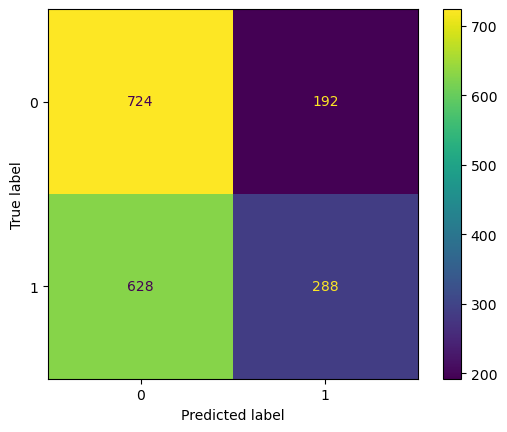

In [46]:
ConfusionMatrixDisplay(confusion_matrix(test_labeled_df ['label'], test_labeled_df ['predictions'])).plot()

In [47]:
count_val_scores = []
count_models = []
count_labels_per_cluster = []

In [48]:
for k in range (1, 60):
    val_score, model, label = cluster_news (k, count_train, count_val)
    count_val_scores.append (val_score)
    count_models.append (model)
    count_labels_per_cluster.append (label)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_km

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Ap

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Ap

In [51]:
scores_df = pd.DataFrame (count_val_scores)
scores_df.sort_values ('Recall', ascending = False)

,K,Accuracy,F1 Micro Average,F1 Macro Average,Hamming Loss,Precision,Recall
1,2,0.517053,0.517053,0.391459,0.482947,0.592771,0.517053
0,1,0.500682,0.500682,0.333636,0.499318,0.250683,0.500682
16,17,0.225102,0.225102,0.052247,0.774898,0.691778,0.225102
4,5,0.200546,0.200546,0.095610,0.799454,0.296775,0.200546
9,10,0.186903,0.186903,0.060902,0.813097,0.706624,0.186903
7,8,0.166439,0.166439,0.054115,0.833561,0.285772,0.166439
14,15,0.159618,0.159618,0.044258,0.840382,0.537697,0.159618
22,23,0.128240,0.128240,0.021694,0.871760,0.542757,0.128240
19,20,0.121419,0.121419,0.022692,0.878581,0.675866,0.121419
13,14,0.120055,0.120055,0.032846,0.879945,0.493584,0.120055


In [52]:
val_predictions = count_models [1].predict (count_val)
val_labeled_df = val_df.copy() 
val_labeled_df ['predictions'] = val_predictions 
val_labeled_df ['predictions'] = val_labeled_df ['predictions'].replace(count_val_scores [1])

In [53]:
dict_scores = format_scores (2, val_labeled_df ['label'], val_labeled_df ['predictions'])
dict_scores

{'K': 2,
 'Accuracy': 0.5170532060027285,
 'F1 Micro Average': 0.5170532060027285,
 'F1 Macro Average': 0.3914587242026267,
 'Hamming Loss': 0.4829467939972715,
 'Precision': 0.5927707609400844,
 'Recall': 0.5170532060027285}

In [54]:
test_predictions = count_models [1].predict (count_test)
test_labeled_df = test_df.copy() 
test_labeled_df ['predictions'] = test_predictions 
test_labeled_df ['predictions'] = test_labeled_df ['predictions'].replace(count_labels_per_cluster [1])

In [55]:
dict_scores = format_scores (2, test_labeled_df ['label'], test_labeled_df ['predictions'])
dict_scores

{'K': 2,
 'Accuracy': 0.5240174672489083,
 'F1 Micro Average': 0.5240174672489083,
 'F1 Macro Average': 0.4003363363363363,
 'Hamming Loss': 0.4759825327510917,
 'Precision': 0.6372452871308706,
 'Recall': 0.5240174672489083}

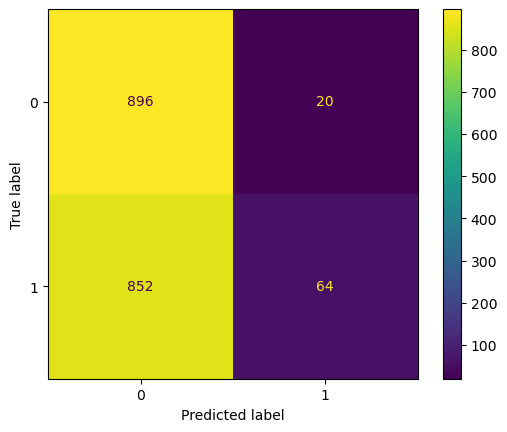

In [56]:
ConfusionMatrixDisplay(confusion_matrix(test_labeled_df ['label'], test_labeled_df ['predictions'])).plot()

In [ ]:
count_val_scores = []
count_models = []
count_labels_per_cluster = []

In [92]:
for k in range (1, 60):
    val_score, model, label = cluster_news (k, count_train, count_val)
    count_val_scores.append (val_score)
    count_models.append (model)
    count_labels_per_cluster.append (label)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_km

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Ap

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

In [93]:
scores_df = pd.DataFrame (count_val_scores)
scores_df.sort_values ('Recall', ascending = False)

,K,Accuracy,F1 Micro Average,F1 Macro Average,Hamming Loss,Precision,Recall
65,7,0.519782,0.519782,0.340138,0.480218,0.581610,0.519782
1,2,0.517053,0.517053,0.391459,0.482947,0.592771,0.517053
64,6,0.517053,0.517053,0.255058,0.482947,0.582913,0.517053
0,1,0.500682,0.500682,0.333636,0.499318,0.250683,0.500682
59,1,0.500682,0.500682,0.333636,0.499318,0.250683,0.500682
...,...,...,...,...,...,...,...
108,50,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
109,51,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
106,48,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
115,57,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
